# Курсовой проект


Выполнил Моисеенков Илья, М8О-408Б-19

## Задание

1.  Выбрать задачу (классификация или регрессия)
2.	Выбрать датасет
3.	Сделать описание датасета
4.	Сделать и описать предпроцессинг над датасетом
5.	Выбрать алгоритм
6.	Реализовать алгоритм
7.	Сделать описание алгоритма
8.	Выбрать метрики качества
9.	Продемонстрировать полученные результаты
10.	Сравнить результат вашего алгоритма с алгоритмом из sklearn
11.	Выводы


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Постановка задачи

Эйчары хотят понимать, что будет в будущем с сотрудниками компании - продолжат ли они работать или уволятся/перейдут в другую компанию. Если знать, что сотрудник собирается уйти, то компания может попытаться удержать его или заранее начать поиск новых кадров. Попробуем построить ML модель для предсказания вероятности того, что сотрудник покинет компанию в ближашие 2 года.

In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.shape

(4653, 9)

## Описание датасета & EDA

Education - уровень образования  
JoiningYear - год принятия на работу  
City - город, в котором работает сотрудник  
PaymentTier - уровень заработной платы (1 - высокий, 2 - средний, 3 - низкий)  
Age - возраст  
Gender - пол  
EverBenched - отстранялся ли когда-либо сотрудник от работы  
ExperienceInCurrentDomain - стаж в текущей сфере  
LeaveOrNot - покинет ли сотрудник компанию в ближайшие два года (таргет)

In [7]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

В датасете нет пропусков, это хорошо

### Education

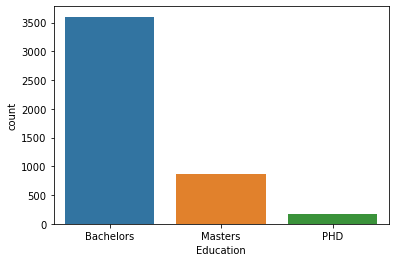

In [8]:
sns.countplot(x=df.Education)
plt.show()

Большинство людей в датасете имеют степень бакалавра.

### Joining year

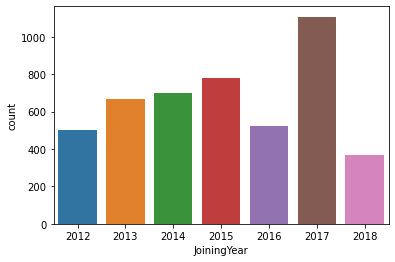

In [9]:
sns.countplot(x=df.JoiningYear)
plt.show()

Использовать эту категориальную фичу не очень хорошо. Перейдем к количественной фиче - сколько лет провел сотрудник в компании.

In [10]:
df['YearsInCompany'] = 2022 - df['JoiningYear']

### City

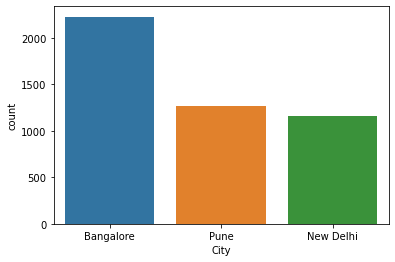

In [11]:
sns.countplot(x=df.City)
plt.show()

Компания, сотрудников которой мы рассматриваем, имеет офисы в трех городах индии. Большинство сотрудников работает в Бангалоре. Также примерно одинаковое количество сотрудников находятся в Пуне и Нью-Дели.

### Payment Tier

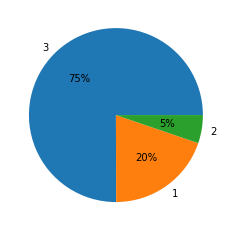

In [12]:
plt.pie(x=df.PaymentTier.value_counts(), labels=df.PaymentTier.unique(), autopct='%.0f%%')
plt.show()

75% сотрудников имеют относительно низкий уровень зарплаты. Только 20% сотрудников получают достаточно много.

### Age

Возраст можно рассматривать и как категориальную, и как количественную фичу. Буду рассматривать его именно как количественный признак.

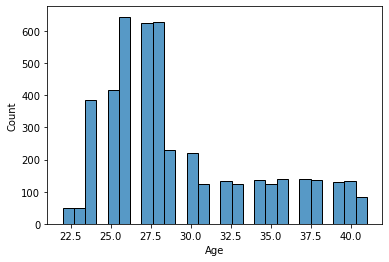

In [13]:
sns.histplot(df.Age)
plt.show()

Распределение не похоже на нормальное, но ничего страшного.

Самому молодому сотруднику компании 22 года. Самому старому - 41. Возраст большей части работников - 25-28 лет.

### Gender

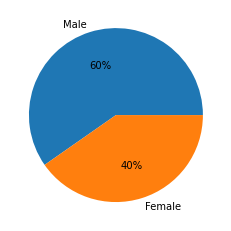

In [14]:
plt.pie(x=df.Gender.value_counts(), labels=df.Gender.unique(), autopct='%.0f%%')
plt.show()

В компании работает больше мужчин, чем женщин.

### Ever Benched

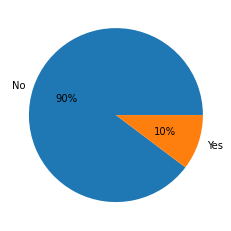

In [15]:
plt.pie(x=df.EverBenched.value_counts(), labels=df.EverBenched.unique(), autopct='%.0f%%')
plt.show()

10% сотрудников когда-либо отсранялись от работы..

### Experience In Current Domain

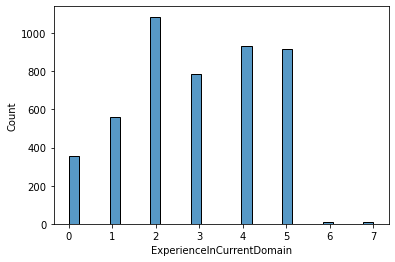

In [16]:
sns.histplot(df.ExperienceInCurrentDomain)
plt.show()

Только небольшое число сотрудников имеют 6+ лет опыта в своей сфере

### Leave Or Not

Посмотрим на распределение таргета

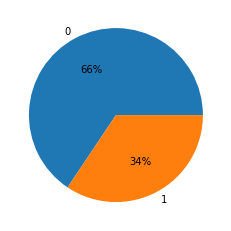

In [17]:
plt.pie(x=df.LeaveOrNot.value_counts(), labels=df.LeaveOrNot.unique(), autopct='%.0f%%')
plt.show()

Классы распределены в соотношении 2:1. Это не самая сбалансированная выборка, но сойдет. Помимо обычного accuracy стоит смотреть еще на другие метрики (например, precision, recall), чтобы понимать точную картинку происходящего.

Теперь поймем, зависит ли таргет от имеющихся фичей. Для удобства сразу поделим фичи на категориальные и численные.

In [18]:
numerical_features = ['YearsInCompany', 'Age', 'ExperienceInCurrentDomain']
categorical_features = ['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched']
target = 'LeaveOrNot'

Сначала рассмотрим зависимость от категориальных фичей.

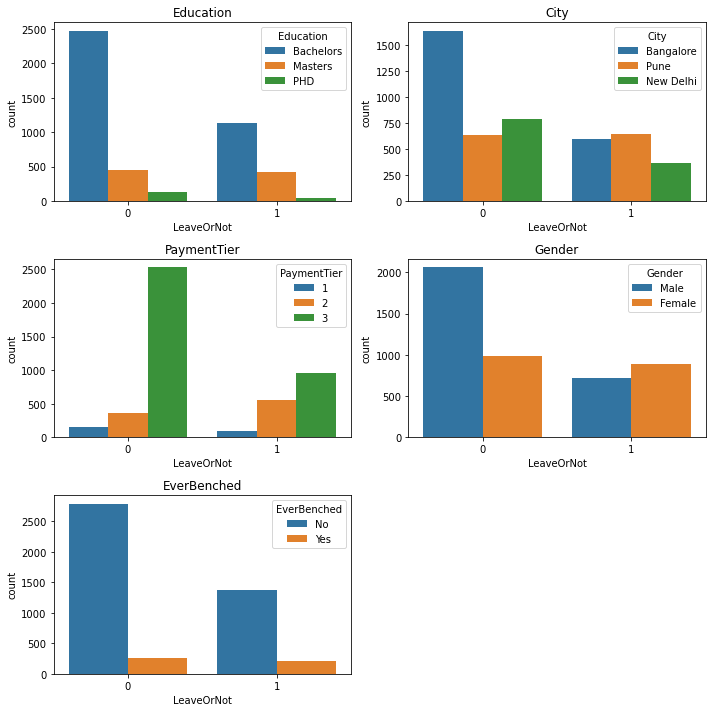

In [19]:
plt.figure(figsize=(10, 10))

for i in range(0, len(categorical_features), 2):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[target], hue=df[categorical_features[i]])
    plt.title(str(categorical_features[i]))
    if i+1 == len(categorical_features):
        break
    plt.subplot(3, 2, i+2)
    sns.countplot(x=df[target], hue=df[categorical_features[i+1]])
    plt.title(str(categorical_features[i+1]))

plt.tight_layout()
plt.show()

* В Бангалоре люди реже увольняются из компании
* Вероятность того, что женщина уволится, больше, чем вероятность увольнения мужчины
* Большая часть людей со средней ЗП покинула компанию

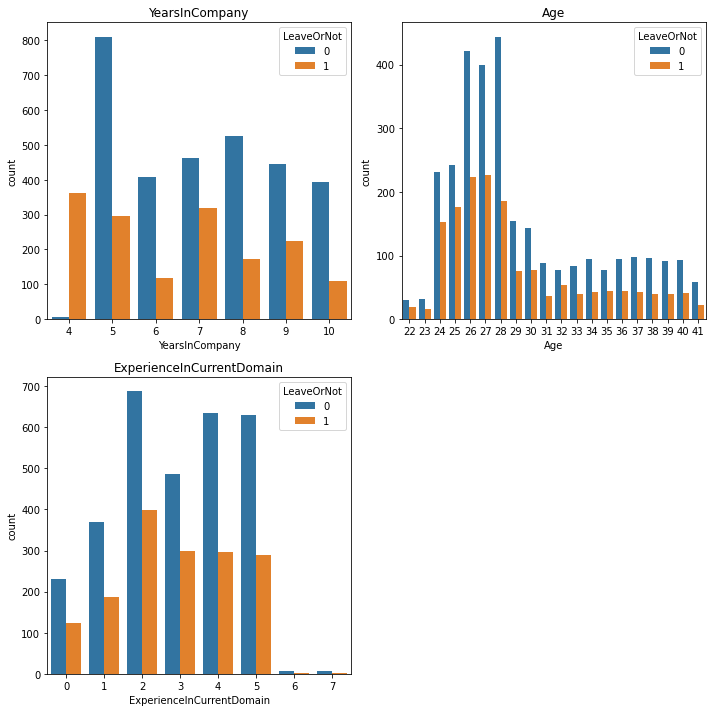

In [21]:
plt.figure(figsize=(10, 10))

for i in range(0, len(numerical_features), 2):
    plt.subplot(2, 2, i+1)
    sns.countplot(hue=df[target], x=df[numerical_features[i]])
    plt.title(str(numerical_features[i]))
    if i+1 == len(numerical_features):
        break
    plt.subplot(2, 2, i+2)
    sns.countplot(hue=df[target], x=df[numerical_features[i+1]])
    plt.title(str(numerical_features[i+1]))

plt.tight_layout()
plt.show()

Проверим, что количественные фичи не коррелируют друг с другом

In [22]:
df[numerical_features].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,YearsInCompany,Age,ExperienceInCurrentDomain
YearsInCompany,1.00,-0.01,0.04
Age,-0.01,1.00,-0.13
ExperienceInCurrentDomain,0.04,-0.13,1.00


Сильной корреляции нет, значит будем использовать все эти фичи

## Подготовка данных к обучению

Перед обучением данные необходимо:
* поделить данные на трейн и тест  
* заванхотэнкодить категориальные фичи
* отскейлить численные фичи

In [42]:
X = df[numerical_features + categorical_features]
y = df[target]

In [43]:
X.shape, y.shape

((4653, 8), (4653,))

In [44]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape, X_test.shape

((3722, 11), (931, 11))

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Реализация алгоритма обучения

В качестве модели буду использовать алгоритм логистической регрессии.

Каждому признаку в датасете сопоставим некий вес. Также добавим фиктивный признак, равный единице (bias). Вычислим скалярное произведение весов и признаков. От полученного числа возьмем сигмоиду, чтобы трансформивать результат в интервал [0; 1].

Обучать будем, меняя веса с помощью градиентного спуска, используемый лосс - логлосс (который по сути максимизирует вероятность угадывания класса).

Для логистической регрессии важно, чтобы признаки были равнозначны между собой. Поэтому мы их и скейлили.

In [49]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.model_selection import GridSearchCV

In [50]:
class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, lr=0.1, batch_size=256):
        self.w = None
        self.epochs = epochs
        self.lr = lr
        self.batch_size = batch_size
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        n, k = X.shape
        
        if self.w is None:
            np.random.seed(0xDEAD)
            # weights
            self.w = np.random.randn(k + 1)

        X = np.concatenate((np.ones((n, 1)), X), axis=1)  # add bias as feature
        for i in range(self.epochs):
            for j in range(0, len(X), self.batch_size):
                X_batch = X[j:j+self.batch_size]
                y_batch = y[j:j+self.batch_size]
                
                y_pred = self._predict_proba_internal(X_batch)
                self.w -= self.lr * self._get_gradient(X_batch, y_batch, y_pred)

        return self
    
    def _get_gradient(self, X_batch, y_batch, y_pred):
        """
        Get gradient for logistic regression
        """
        gradient = X_batch.T @ (y_pred - y_batch)
        return gradient
        
    def predict_proba(self, X):
        X = check_array(X)
        
        n = X.shape[0]
        X = np.concatenate((np.ones((n, 1)), X), axis=1)
        return self._sigmoid(np.dot(X, self.w))

    def _predict_proba_internal(self, X): 
        """
        This function is similar to predict_proba, but we don't concatenate bias here.
        It is used for fitting.
        """
        return self._sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) > threshold
    
    def _sigmoid(self, a):
        return 1. / (1 + np.exp(-a))

In [81]:
model = MyLogisticRegression(epochs=10, lr=0.001)
model = model.fit(X_train, y_train)

## Обучение с помощью sklearn

In [108]:
from sklearn.linear_model import LogisticRegression

model_sklearn = LogisticRegression(C=0.01, penalty='l2')
model_sklearn = model_sklearn.fit(X_train, y_train)

## Проверка качества

Будем смотреть на следующие метрики:
* Precision
* Recall
* Accuracy
* ROC AUC

Также построим следующие графики:
* PR curve
* ROC curve

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

In [83]:
def get_metrics(y_test, y_pred, y_pred_probas):
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('Precision = ', precision_score(y_test, y_pred))
    print('Recall = ', recall_score(y_test, y_pred))
    print('ROC AUC = ', roc_auc_score(y_test, y_pred_probas))
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probas)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas)

    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Recall')
    plt.ylabel('Presicion')
    plt.title('Precision-recall curve')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid()
    plt.plot(recall, precision)
    
    plt.subplot(1, 2, 2)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title('ROC curve')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid()
    plt.plot(fpr, tpr)
    plt.show()

Посмотрим на метрики нашей модели

In [104]:
y_pred = model.predict(X_test)
y_pred_probas = model.predict_proba(X_test)

Accuracy =  0.7432867883995704
Precision =  0.7287234042553191
Recall =  0.42153846153846153
ROC AUC =  0.7458314292967758


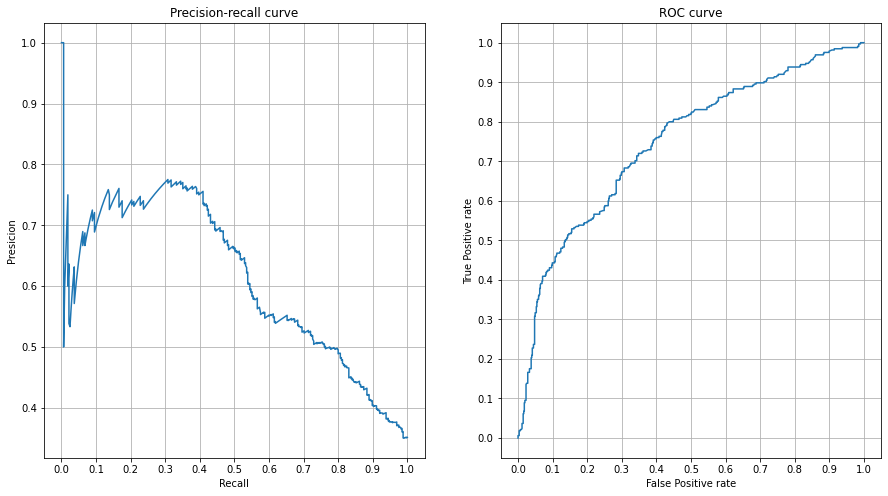

In [105]:
get_metrics(y_test, y_pred, y_pred_probas)

И модели из склерна

In [109]:
y_pred_sklearn = model_sklearn.predict(X_test)
y_pred_probas_sklearn = model_sklearn.predict_proba(X_test)[:, 1]

Accuracy =  0.7422126745435016
Precision =  0.7428571428571429
Recall =  0.4
ROC AUC =  0.7552246763137852


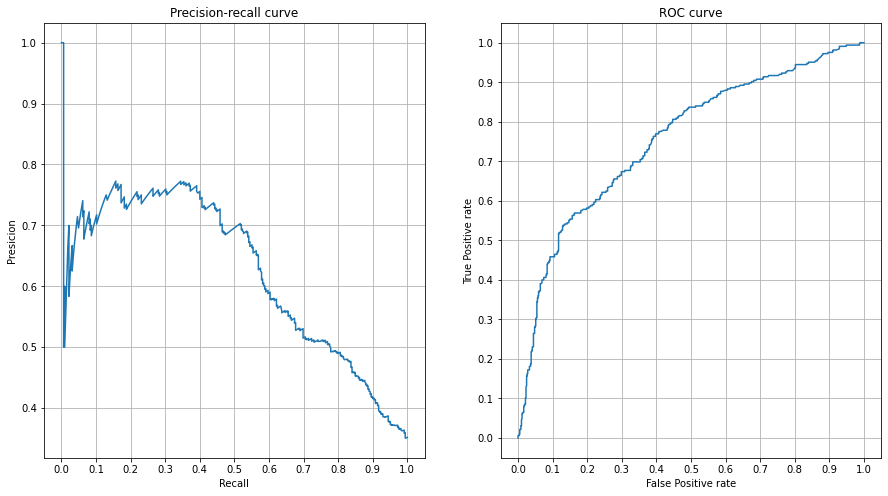

In [110]:
get_metrics(y_test, y_pred_sklearn, y_pred_probas_sklearn)

Мы получили почти одинаковые результаты, значит мой алгоритм работает корректно.

* пресижен = 0.74. Это означает, что 74% единичек, предсказанных моделью, на самом деле являются единичками.
* реколл = 0.42. Это означает, что модель распознала 42% фактических единичек.
* ROC AUC = 0.74. Это означает, что площадь под ROC кривой равна 0.74. Это значение сильно больше 0.5, значит наша модель не просто рандомит, а понимает какие-то закономерности.
* при необходимости можно подкрутить пороги, чтобы повысить пресижен. Можно например поднять пресижен до 0.78 при реколле 0.3. А можно наоборот  повысить реколл до 0.6 с пресиженом 0.58

## Выводы

В данной работе я решил еще одну МЛ задачу. Это была задача классификации. Нужно было определить, уволится ли сотрудник в ближайшие два года с текущего места работы.

Я прошел через весь стандартный пайплайн решения таких задач - исследование данных, фиче инжениринг, обучение моделей (+ подбор гиперпараметров) и оценка результата. Также я написал свою реализацию логистической регрессии, которая работает на равне с библиотечной моделью.

Используемая логистическая регрессия показала хорошее качество на этой задаче. Возможно, использование нелинейных алгоритмов (например, случайного леса или бустинга) дало бы еще более высокий результат.

В ходе работы я закрепил имеющиеся знания по машинному обучению и анализу данных.